               Close
Date                
1980-12-12  0.128348
1980-12-15  0.121652
1980-12-16  0.112723
1980-12-17  0.115513
1980-12-18  0.118862
              Close
count  10590.000000
mean      16.332137
std       34.928463
min        0.049107
25%        0.286830
50%        0.484375
75%       15.968750
max      182.009995
Epoch 1/20


c:\Users\rajsh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


264/264 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - loss: 1.0936e-04 - val_loss: 0.0019
Epoch 2/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - loss: 1.3088e-05 - val_loss: 6.9354e-04
Epoch 3/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 16s 61ms/step - loss: 1.2555e-05 - val_loss: 0.0021
Epoch 4/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step - loss: 1.2427e-05 - val_loss: 0.0024
Epoch 5/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 16s 62ms/step - loss: 1.0946e-05 - val_loss: 0.0039
Epoch 6/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 16s 62ms/step - loss: 1.1682e-05 - val_loss: 0.0020
Epoch 7/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - loss: 9.4922e-06 - val_loss: 0.0012
Epoch 8/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - loss: 1.0849e-05 - val_loss: 0.0031
Epoch 9/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 18s 69ms/step - loss: 1.0249e-05 - val_loss: 6.1083e-04
Epoch 10/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 17s 64ms/step - loss: 1.1739e-05 - val_loss: 0.0014
Epoch 11/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - loss: 1.0154e-05 - val_lo

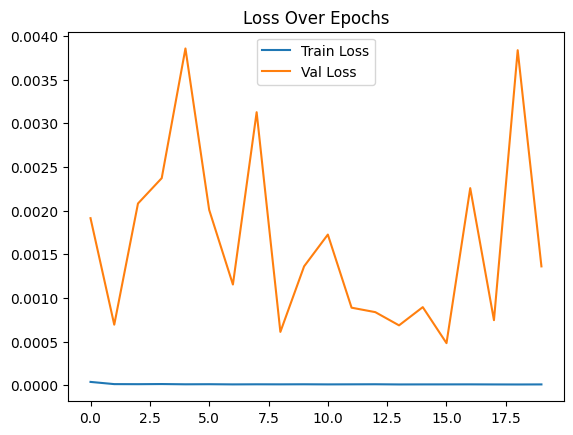

66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step


C:\Users\rajsh\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


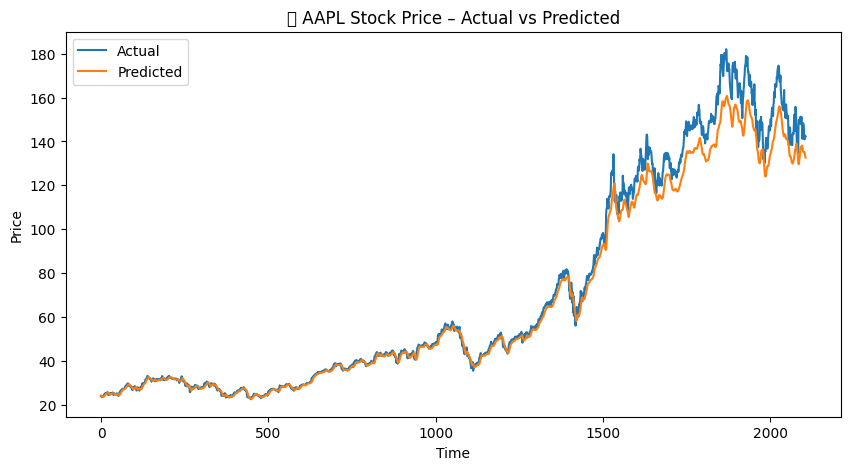

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv("AAPL.csv")
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)

# Only keep 'Close' price
data = df[['Close']].copy()

print(data.head())
print(data.describe())
from sklearn.preprocessing import MinMaxScaler

# Scale data between 0 and 1
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_steps = 60
X, y = create_sequences(scaled_data, time_steps)

# Reshape for LSTM: (samples, time_steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
# Plot training loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss Over Epochs")
plt.show()
y_pred = model.predict(X_test)
y_pred_scaled = scaler.inverse_transform(y_pred)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot actual vs predicted
plt.figure(figsize=(10,5))
plt.plot(y_test_scaled, label='Actual')
plt.plot(y_pred_scaled, label='Predicted')
plt.legend()
plt.title("📈 AAPL Stock Price – Actual vs Predicted")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()
